In [11]:
import cv2
import numpy as np
import glob
import os
import shutil
from tqdm import tqdm
import random

data_path = "/Volumes/mac_ext_0/research_e/dataset/carla_depth_dataset"

rgb_imgs = glob.glob(
    os.path.join(
        data_path,
        'rgb/*.png'
    )
)

depth_imgs = [x.replace('/rgb/', '/depth/') for x in rgb_imgs]

In [12]:
test_indices_selector = random.sample(range(0, len(rgb_imgs) - 1), 200)

In [13]:
train_list = []
val_list = []

for i in tqdm(range(len(rgb_imgs))):
    if i not in test_indices_selector:
        train_list.append(
            f"{rgb_imgs[i].replace(data_path, '')} {depth_imgs[i].replace(data_path, '')} 1000.0"
        )
    else:
        val_list.append(
            f"{rgb_imgs[i].replace(data_path, '')} {depth_imgs[i].replace(data_path, '')} 1000.0"
        )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1510/1510 [00:00<00:00, 182062.24it/s]


In [17]:
with open(os.path.join(data_path, 'train_split.txt'), 'w') as f:
    f.write("\n".join(train_list))
    
with open(os.path.join(data_path, 'validation_split.txt'), 'w') as f:
    f.write("\n".join(val_list))

In [5]:
# print(np.max(img2))

255 1 (720, 1280, 4) uint8



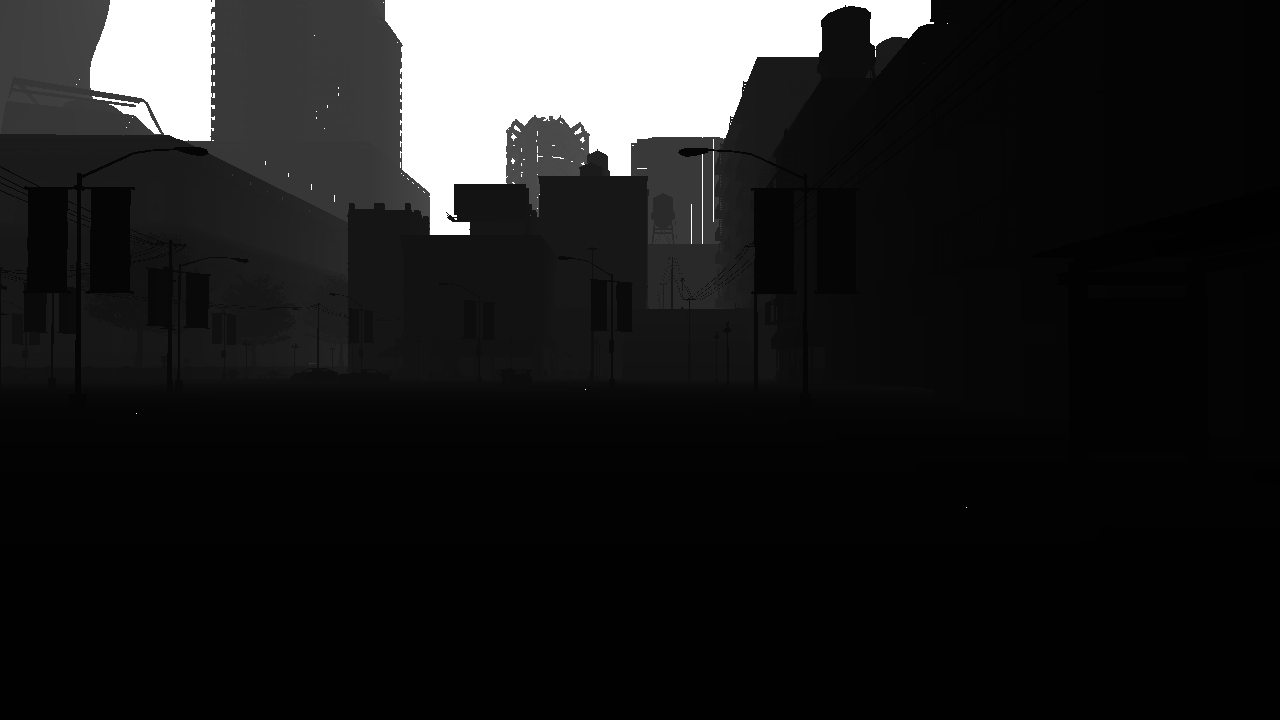

In [12]:
from PIL import Image
import numpy as np
import plotly.express as px

image = "/Volumes/mac_ext_0/research_e/dataset/carla_depth_dataset/depth/00000051.png"

img = Image.open(image)

img = np.array(img)
print(np.max(img), np.min(img), img.shape, img.dtype)
fig = px.imshow(img)
fig.show()